In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CSV files/axis_day_data.csv')
df.head()

,Unnamed: 0,date,open,high,low,close,volume
0,0,2014-01-01 00:00:00+05:30,260.30,261.00,257.64,258.44,2849424
1,1,2014-01-02 00:00:00+05:30,258.40,265.00,252.67,254.46,12972059
2,2,2014-01-03 00:00:00+05:30,251.60,253.90,249.12,252.18,12018739
3,3,2014-01-06 00:00:00+05:30,251.51,252.40,248.32,251.26,9181444
4,4,2014-01-07 00:00:00+05:30,251.50,253.16,243.10,246.85,15100309


In [ ]:
mean_data=df.iloc[:,2:4].mean(axis=1)
mean_data.head()

0    260.650
1    261.700
2    252.750
3    251.955
4    252.330
dtype: float64

In [ ]:
df['mean_data']=mean_data
dataset=df[['date','mean_data']]
dataset.head()

,date,mean_data
0,2014-01-01 00:00:00+05:30,260.650
1,2014-01-02 00:00:00+05:30,261.700
2,2014-01-03 00:00:00+05:30,252.750
3,2014-01-06 00:00:00+05:30,251.955
4,2014-01-07 00:00:00+05:30,252.330


In [ ]:
from datetime import datetime
#Removed time from date
dataset['date']=pd.to_datetime(dataset['date'])
dataset['date'] = dataset['date'].dt.date
dataset.set_index('date', inplace=True)
dataset.head()

<ipython-input-20-b8f525623aee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date']=pd.to_datetime(dataset['date'])
<ipython-input-20-b8f525623aee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset['date'].dt.date


,mean_data
date,
2014-01-01,260.650
2014-01-02,261.700
2014-01-03,252.750
2014-01-06,251.955
2014-01-07,252.330


# First instance

In [ ]:
dataset.count()

mean_data    2450
dtype: int64

In [ ]:
#train set= 2445 records
train=dataset.iloc[:2440]
#test set= 5 records
test=dataset.iloc[2440:]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))

153


In [ ]:
X,y=train_generator [0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[0.04162628 0.04275714 0.03311793 0.03226171 0.03266559 0.04275714
 0.03311793 0.03226171 0.03266559 0.02854066 0.03311793 0.03226171
 0.03266559 0.02854066 0.02106085 0.03226171 0.03266559 0.02854066
 0.02106085 0.01836295 0.03266559 0.02854066 0.02106085 0.01836295
 0.01561659 0.02854066 0.02106085 0.01836295 0.01561659 0.01707593
 0.02106085 0.01836295 0.01561659 0.01707593 0.01647819 0.01836295
 0.01561659 0.01707593 0.01647819 0.01750135 0.01561659 0.01707593
 0.01647819 0.01750135 0.01572429 0.01707593 0.01647819 0.01750135
 0.01572429 0.00976844 0.01647819 0.01750135 0.01572429 0.00976844
 0.01476575 0.01750135 0.01572429 0.00976844 0.01476575 0.01813678
 0.01572429 0.00976844 0.01476575 0.01813678 0.01975767 0.00976844
 0.01476575 0.01813678 0.01975767 0.02281099 0.01476575 0.01813678
 0.01975767 0.02281099 0.015035   0.01813678 0.01975767 0.02281099
 0.015035   0.01249327]
Predict this y: 
[[0.02854066]
 [0.02106085]
 [0.01836295]
 [0.01561659]
 [0.01707593]


In [ ]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)

Epoch 1/100
153/153 [==============================] - 2s 6ms/step - loss: 0.0513
Epoch 2/100
153/153 [==============================] - 1s 7ms/step - loss: 8.0819e-04
Epoch 3/100
153/153 [==============================] - 1s 7ms/step - loss: 6.1177e-04
Epoch 4/100
153/153 [==============================] - 1s 6ms/step - loss: 4.8681e-04
Epoch 5/100
153/153 [==============================] - 1s 4ms/step - loss: 4.4197e-04
Epoch 6/100
153/153 [==============================] - 1s 4ms/step - loss: 4.4463e-04
Epoch 7/100
153/153 [==============================] - 1s 5ms/step - loss: 4.3645e-04
Epoch 8/100
153/153 [==============================] - 1s 5ms/step - loss: 4.2908e-04
Epoch 9/100
153/153 [==============================] - 1s 5ms/step - loss: 4.4547e-04
Epoch 10/100
153/153 [==============================] - 1s 5ms/step - loss: 4.1521e-04
Epoch 11/100
153/153 [==============================] - 1s 5ms/step - loss: 4.7642e-04
Epoch 12/100
153/153 [==============================] - 

In [ ]:
print(len(train))

2440


In [ ]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])  # Append the new X to xlist
  ylist = np.vstack([ylist, y.reshape(1, -1)])  # Append the new y to ylist
print('xlist',xlist)
print('ylist',ylist)

xlist [[0.86588584 0.89041465 0.90158858 0.90519655 0.96389338]
 [0.89041465 0.90158858 0.90519655 0.96389338 0.98403339]
 [0.90158858 0.90519655 0.96389338 0.98403339 0.99639203]
 [0.90519655 0.96389338 0.98403339 0.99639203 1.02264405]
 [0.96389338 0.98403339 0.99639203 1.02264405 1.01561659]]
ylist [[0.98403339]
 [0.99639203]
 [1.02264405]
 [1.01561659]
 [1.00708131]]


In [ ]:
ypred=model.predict(xlist)
print(ypred)

1/1 [==============================] - 0s 187ms/step
[[0.96923184]
 [0.98544896]
 [0.9954178 ]
 [1.0231888 ]
 [1.0059109 ]]


In [ ]:
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('true pred',true_predictions)
# [true_predictions[i] for i in range(len(true_predictions))]
print('ylist ',ylist)
# [ylist[i] for i in range(len(ylist))]

true pred [[1121.9318]
 [1136.9894]
 [1146.2454]
 [1172.0309]
 [1155.9883]]
ylist  [[1135.675]
 [1147.15 ]
 [1171.525]
 [1165.   ]
 [1157.075]]


instace 1


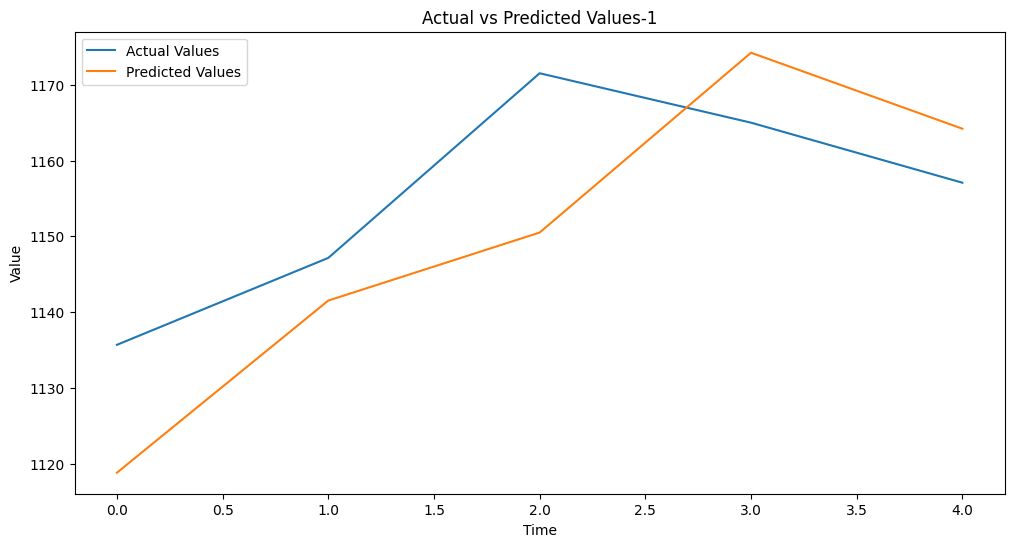

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 1')
plt.title('Actual vs Predicted Values-1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# second

In [ ]:
train=dataset.iloc[:2430]
#test set= 5 records
test=dataset.iloc[2430:2440]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))

152


In [ ]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)

Epoch 1/100
152/152 [==============================] - 3s 7ms/step - loss: 0.0356
Epoch 2/100
152/152 [==============================] - 1s 6ms/step - loss: 4.2453e-04
Epoch 3/100
152/152 [==============================] - 1s 6ms/step - loss: 4.4181e-04
Epoch 4/100
152/152 [==============================] - 1s 6ms/step - loss: 3.7658e-04
Epoch 5/100
152/152 [==============================] - 2s 10ms/step - loss: 3.8288e-04
Epoch 6/100
152/152 [==============================] - 1s 9ms/step - loss: 4.1285e-04
Epoch 7/100
152/152 [==============================] - 2s 12ms/step - loss: 3.9099e-04
Epoch 8/100
152/152 [==============================] - 1s 9ms/step - loss: 3.7137e-04
Epoch 9/100
152/152 [==============================] - 1s 9ms/step - loss: 3.5911e-04
Epoch 10/100
152/152 [==============================] - 1s 5ms/step - loss: 4.0085e-04
Epoch 11/100
152/152 [==============================] - 1s 4ms/step - loss: 3.7487e-04
Epoch 12/100
152/152 [==============================] 

In [ ]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])  # Append the new X to xlist
  ylist = np.vstack([ylist, y.reshape(1, -1)])  # Append the new y to ylist
print('xlist',xlist)
print('ylist',ylist)

xlist [[0.8993538  0.919063   0.90473883 0.91677437 0.93484114]
 [0.919063   0.90473883 0.91677437 0.93484114 0.93441034]
 [0.90473883 0.91677437 0.93484114 0.93441034 0.93263328]
 [0.91677437 0.93484114 0.93441034 0.93263328 0.91012386]
 [0.93484114 0.93441034 0.93263328 0.91012386 0.89596123]]
ylist [[0.93441034]
 [0.93263328]
 [0.91012386]
 [0.89596123]
 [0.88936457]]


1/1 [==============================] - 0s 359ms/step
--------------------
predictions [[1094.8434]
 [1089.4222]
 [1087.344 ]
 [1059.928 ]
 [1048.7087]]
Actual values [[1089.6  ]
 [1087.95 ]
 [1067.05 ]
 [1053.9  ]
 [1047.775]]
--------------------
instace 2


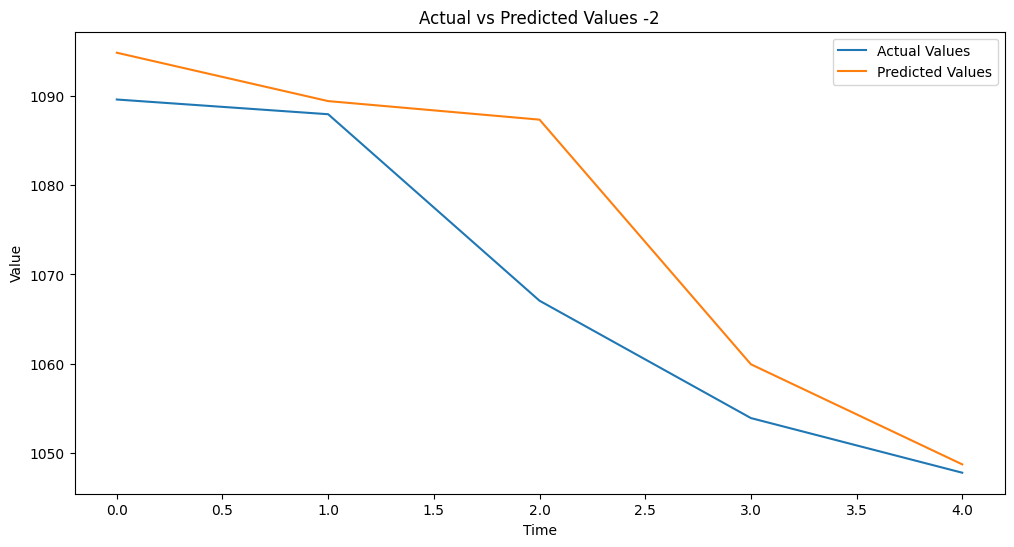

In [ ]:
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)
print('instace 2')
plt.title('Actual vs Predicted Values -2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Third

151
Epoch 1/100
151/151 [==============================] - 7s 10ms/step - loss: 0.0513
Epoch 2/100
151/151 [==============================] - 1s 9ms/step - loss: 9.3822e-04
Epoch 3/100
151/151 [==============================] - 1s 9ms/step - loss: 4.4103e-04
Epoch 4/100
151/151 [==============================] - 2s 10ms/step - loss: 4.3773e-04
Epoch 5/100
151/151 [==============================] - 1s 9ms/step - loss: 4.6528e-04
Epoch 6/100
151/151 [==============================] - 2s 14ms/step - loss: 4.3061e-04
Epoch 7/100
151/151 [==============================] - 2s 14ms/step - loss: 4.2572e-04
Epoch 8/100
151/151 [==============================] - 2s 13ms/step - loss: 5.0675e-04
Epoch 9/100
151/151 [==============================] - 2s 10ms/step - loss: 3.8338e-04
Epoch 10/100
151/151 [==============================] - 1s 9ms/step - loss: 4.8857e-04
Epoch 11/100
151/151 [==============================] - 1s 9ms/step - loss: 5.1705e-04
Epoch 12/100
151/151 [========================

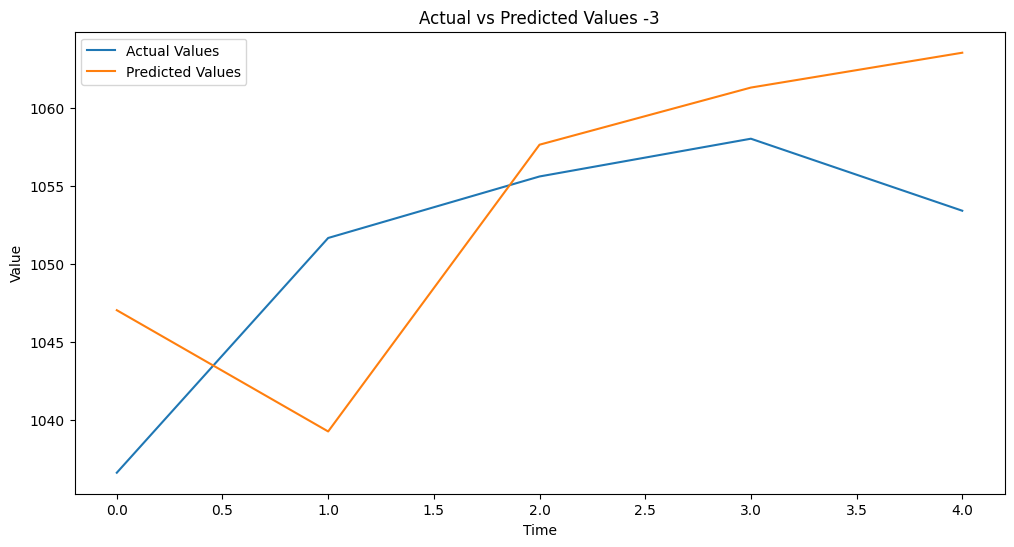

In [ ]:
train=dataset.iloc[:2420]
#test set= 5 records
test=dataset.iloc[2420:2430]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 3')
plt.title('Actual vs Predicted Values -3')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Fourth

151
Epoch 1/100
151/151 [==============================] - 8s 9ms/step - loss: 0.0427
Epoch 2/100
151/151 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 3/100
151/151 [==============================] - 1s 9ms/step - loss: 6.2172e-04
Epoch 4/100
151/151 [==============================] - 1s 7ms/step - loss: 5.1433e-04
Epoch 5/100
151/151 [==============================] - 1s 7ms/step - loss: 5.1575e-04
Epoch 6/100
151/151 [==============================] - 1s 8ms/step - loss: 5.1921e-04
Epoch 7/100
151/151 [==============================] - 2s 10ms/step - loss: 4.8823e-04
Epoch 8/100
151/151 [==============================] - 2s 10ms/step - loss: 4.8721e-04
Epoch 9/100
151/151 [==============================] - 1s 9ms/step - loss: 4.9189e-04
Epoch 10/100
151/151 [==============================] - 1s 7ms/step - loss: 5.0848e-04
Epoch 11/100
151/151 [==============================] - 1s 8ms/step - loss: 4.9693e-04
Epoch 12/100
151/151 [==============================] 

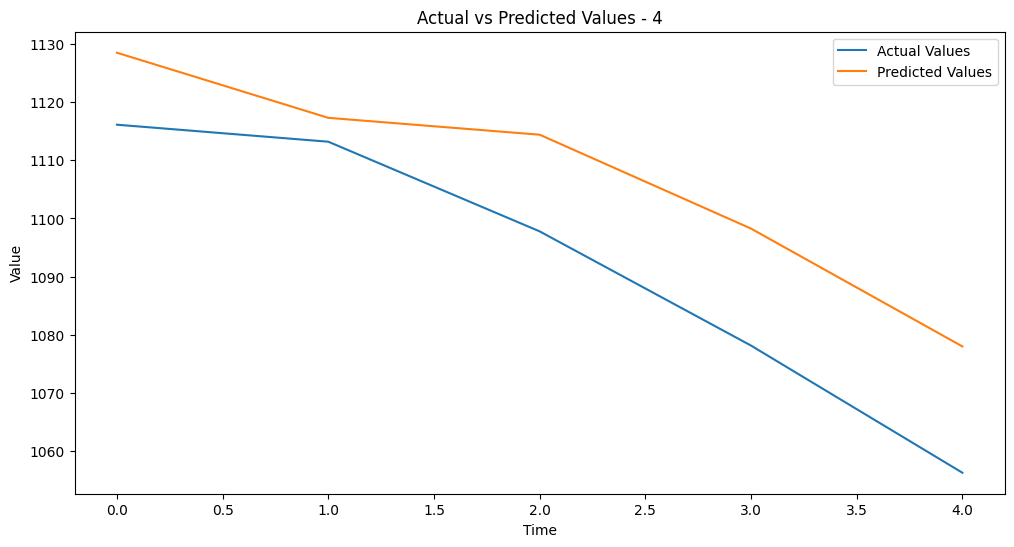

In [ ]:
train=dataset.iloc[:2410]
test=dataset.iloc[2410:2420]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)
print('instace 4')
plt.title('Actual vs Predicted Values - 4')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)

Predicted list
1128.5104
1117.309
1114.4056
1098.252
1077.9774
----------
Actual list
1116.125
1113.2
1097.775
1078.125
1056.25
----------


# Fifth

150
Epoch 1/100
150/150 [==============================] - 4s 7ms/step - loss: 0.0765
Epoch 2/100
150/150 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 3/100
150/150 [==============================] - 2s 10ms/step - loss: 3.9915e-04
Epoch 4/100
150/150 [==============================] - 1s 9ms/step - loss: 3.9427e-04
Epoch 5/100
150/150 [==============================] - 1s 9ms/step - loss: 3.7660e-04
Epoch 6/100
150/150 [==============================] - 2s 14ms/step - loss: 3.8140e-04
Epoch 7/100
150/150 [==============================] - 2s 11ms/step - loss: 4.1524e-04
Epoch 8/100
150/150 [==============================] - 1s 9ms/step - loss: 3.6265e-04
Epoch 9/100
150/150 [==============================] - 1s 9ms/step - loss: 3.7534e-04
Epoch 10/100
150/150 [==============================] - 1s 8ms/step - loss: 3.8909e-04
Epoch 11/100
150/150 [==============================] - 1s 8ms/step - loss: 3.6094e-04
Epoch 12/100
150/150 [==============================]

1/1 [==============================] - 0s 182ms/step
--------------------
predictions [[1106.2899]
 [1095.0283]
 [1083.9296]
 [1079.6768]
 [1075.1904]]
Actual values [[1094.125]
 [1085.1  ]
 [1081.2  ]
 [1076.65 ]
 [1088.85 ]]
--------------------
[1106.2899]
[1095.0283]
[1083.9296]
[1079.6768]
[1075.1904]
list of preds [None, None, None, None, None]
instace 5


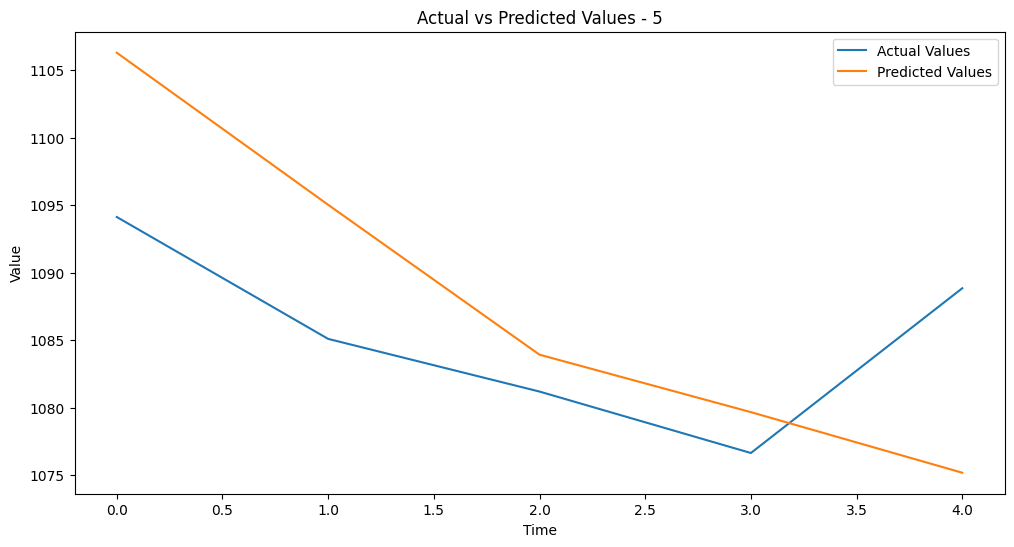

In [ ]:
train=dataset.iloc[:2400]
test=dataset.iloc[2400:2410]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])  # Append the new X to xlist
  ylist = np.vstack([ylist, y.reshape(1, -1)])  # Append the new y to ylist
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)

plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 5')
plt.title('Actual vs Predicted Values - 5')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('list of preds',pred_list)
actual_list=[ylist[i][0] for i in range(len(ylist))]
print('list of actuals',actual_list)

list of preds [1106.2899, 1095.0283, 1083.9296, 1079.6768, 1075.1904]
list of actuals [1094.125, 1085.1, 1081.2, 1076.65, 1088.85]


# sixth

150
Epoch 1/100
150/150 [==============================] - 6s 17ms/step - loss: 0.0398
Epoch 2/100
150/150 [==============================] - 2s 11ms/step - loss: 7.3709e-04
Epoch 3/100
150/150 [==============================] - 1s 9ms/step - loss: 5.2309e-04
Epoch 4/100
150/150 [==============================] - 1s 7ms/step - loss: 4.2503e-04
Epoch 5/100
150/150 [==============================] - 1s 8ms/step - loss: 3.9306e-04
Epoch 6/100
150/150 [==============================] - 1s 8ms/step - loss: 3.8898e-04
Epoch 7/100
150/150 [==============================] - 1s 9ms/step - loss: 4.0638e-04
Epoch 8/100
150/150 [==============================] - 2s 10ms/step - loss: 5.3017e-04
Epoch 9/100
150/150 [==============================] - 2s 10ms/step - loss: 4.2053e-04
Epoch 10/100
150/150 [==============================] - 1s 8ms/step - loss: 3.7825e-04
Epoch 11/100
150/150 [==============================] - 1s 7ms/step - loss: 3.8422e-04
Epoch 12/100
150/150 [==========================

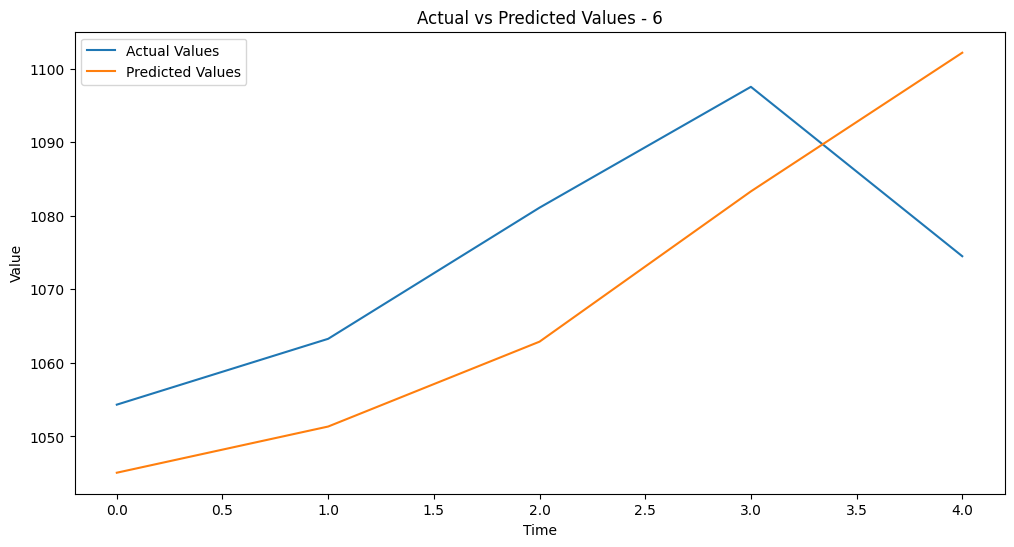

In [ ]:
train=dataset.iloc[:2390]
test=dataset.iloc[2390:2400]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 6')
plt.title('Actual vs Predicted Values - 6')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Seventh

149
Epoch 1/100
149/149 [==============================] - 3s 7ms/step - loss: 0.0259
Epoch 2/100
149/149 [==============================] - 1s 7ms/step - loss: 5.3379e-04
Epoch 3/100
149/149 [==============================] - 1s 5ms/step - loss: 3.7714e-04
Epoch 4/100
149/149 [==============================] - 1s 5ms/step - loss: 3.6084e-04
Epoch 5/100
149/149 [==============================] - 1s 4ms/step - loss: 3.7623e-04
Epoch 6/100
149/149 [==============================] - 1s 5ms/step - loss: 3.7954e-04
Epoch 7/100
149/149 [==============================] - 1s 5ms/step - loss: 3.9187e-04
Epoch 8/100
149/149 [==============================] - 1s 5ms/step - loss: 3.8619e-04
Epoch 9/100
149/149 [==============================] - 1s 5ms/step - loss: 3.5054e-04
Epoch 10/100
149/149 [==============================] - 1s 5ms/step - loss: 3.3629e-04
Epoch 11/100
149/149 [==============================] - 1s 4ms/step - loss: 3.7511e-04
Epoch 12/100
149/149 [==============================

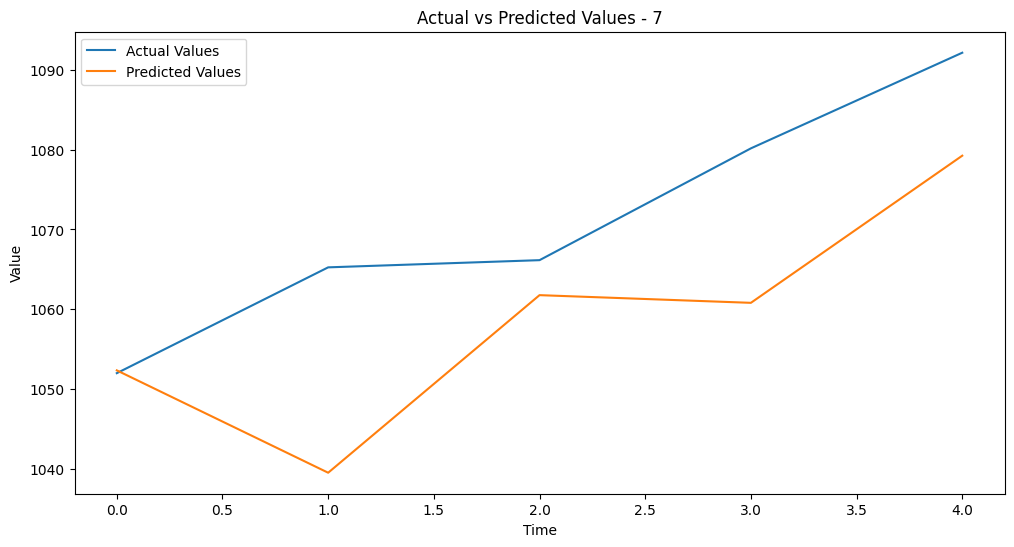

In [ ]:
train=dataset.iloc[:2380]
test=dataset.iloc[2380:2390]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
# print('xlist',xlist)
# print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 7')
plt.title('Actual vs Predicted Values - 7')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)

Predicted list
1045.073
1051.3512
1062.8855
1083.312
1102.1594
----------
Actual list
1054.325
1063.275
1081.1
1097.525
1074.5
----------


# Eighth

148
Epoch 1/100
148/148 [==============================] - 4s 10ms/step - loss: 0.0473
Epoch 2/100
148/148 [==============================] - 2s 11ms/step - loss: 5.5186e-04
Epoch 3/100
148/148 [==============================] - 1s 8ms/step - loss: 3.9481e-04
Epoch 4/100
148/148 [==============================] - 1s 8ms/step - loss: 3.9477e-04
Epoch 5/100
148/148 [==============================] - 1s 10ms/step - loss: 4.0700e-04
Epoch 6/100
148/148 [==============================] - 1s 8ms/step - loss: 4.1960e-04
Epoch 7/100
148/148 [==============================] - 1s 8ms/step - loss: 4.1970e-04
Epoch 8/100
148/148 [==============================] - 1s 9ms/step - loss: 4.0294e-04
Epoch 9/100
148/148 [==============================] - 2s 10ms/step - loss: 3.7960e-04
Epoch 10/100
148/148 [==============================] - 1s 10ms/step - loss: 3.7594e-04
Epoch 11/100
148/148 [==============================] - 1s 7ms/step - loss: 4.4500e-04
Epoch 12/100
148/148 [=========================

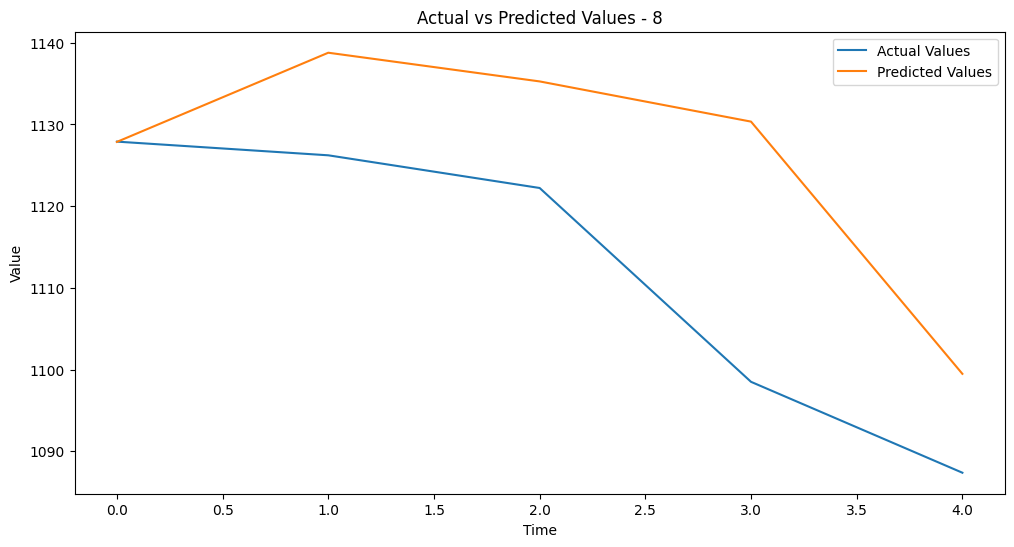

In [ ]:
train=dataset.iloc[:2370]
test=dataset.iloc[2370:2380]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 8')
plt.title('Actual vs Predicted Values - 8')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)

Predicted list
1127.8679
1138.7809
1135.2687
1130.3486
1099.4788
----------
Actual list
1127.9
1126.225
1122.225
1098.5
1087.375
----------


# Ninth

148
Epoch 1/100
148/148 [==============================] - 5s 7ms/step - loss: 0.0503
Epoch 2/100
148/148 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 3/100
148/148 [==============================] - 2s 12ms/step - loss: 4.3372e-04
Epoch 4/100
148/148 [==============================] - 1s 8ms/step - loss: 4.2107e-04
Epoch 5/100
148/148 [==============================] - 1s 5ms/step - loss: 4.3604e-04
Epoch 6/100
148/148 [==============================] - 1s 5ms/step - loss: 4.3439e-04
Epoch 7/100
148/148 [==============================] - 1s 6ms/step - loss: 4.7305e-04
Epoch 8/100
148/148 [==============================] - 1s 7ms/step - loss: 4.2836e-04
Epoch 9/100
148/148 [==============================] - 1s 7ms/step - loss: 4.5381e-04
Epoch 10/100
148/148 [==============================] - 1s 8ms/step - loss: 4.2946e-04
Epoch 11/100
148/148 [==============================] - 1s 6ms/step - loss: 4.4984e-04
Epoch 12/100
148/148 [==============================] -

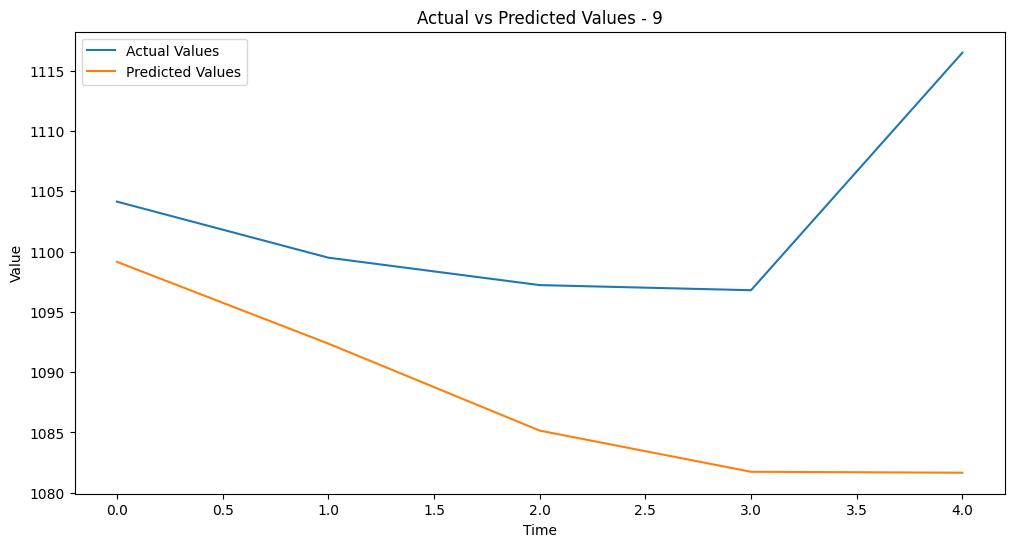

In [ ]:
train=dataset.iloc[:2360]
test=dataset.iloc[2360:2370]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 9')
plt.title('Actual vs Predicted Values - 9')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)

Predicted list
1099.1526
1092.373
1085.1566
1081.7415
1081.662
----------
Actual list
1104.15
1099.5
1097.225
1096.8
1116.5
----------


# Tenth

147
Epoch 1/100
147/147 [==============================] - 2s 4ms/step - loss: 0.0479
Epoch 2/100
147/147 [==============================] - 1s 5ms/step - loss: 0.0016
Epoch 3/100
147/147 [==============================] - 1s 5ms/step - loss: 8.0138e-04
Epoch 4/100
147/147 [==============================] - 1s 5ms/step - loss: 6.4367e-04
Epoch 5/100
147/147 [==============================] - 1s 5ms/step - loss: 5.7427e-04
Epoch 6/100
147/147 [==============================] - 1s 5ms/step - loss: 4.7798e-04
Epoch 7/100
147/147 [==============================] - 1s 5ms/step - loss: 4.6769e-04
Epoch 8/100
147/147 [==============================] - 1s 5ms/step - loss: 4.8244e-04
Epoch 9/100
147/147 [==============================] - 1s 7ms/step - loss: 4.6007e-04
Epoch 10/100
147/147 [==============================] - 1s 9ms/step - loss: 5.3113e-04
Epoch 11/100
147/147 [==============================] - 2s 12ms/step - loss: 4.2648e-04
Epoch 12/100
147/147 [==============================] -

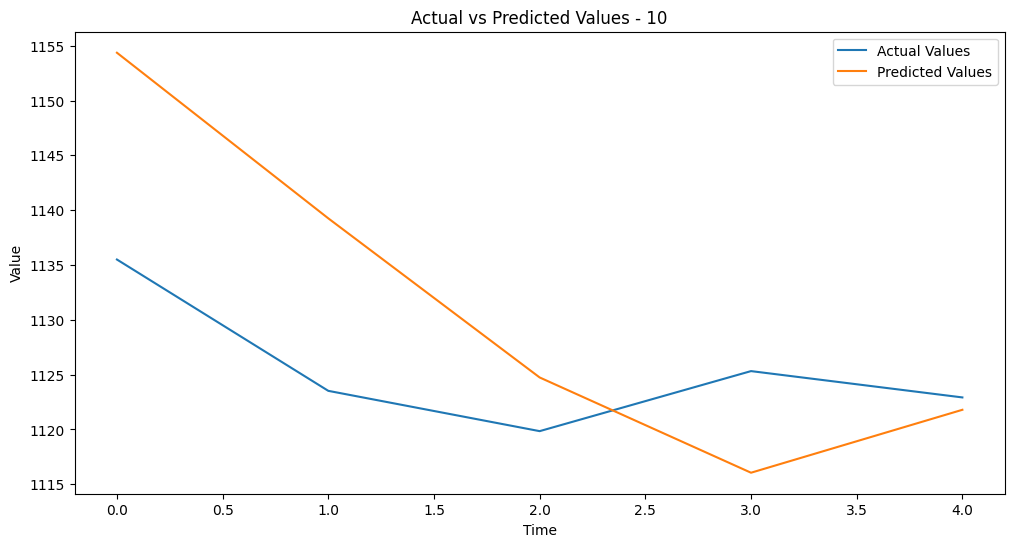

In [ ]:
train=dataset.iloc[:2350]
test=dataset.iloc[2350:2360]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 10')
plt.title('Actual vs Predicted Values - 10')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)

Actual list
1135.5
1123.525
1119.85
1125.3249999999998
1122.925
----------
Predicted list
1154.3569
1139.2545
1124.7457
1116.0587
1121.7972
----------


# eleventh

146
Epoch 1/100
146/146 [==============================] - 3s 5ms/step - loss: 0.0316
Epoch 2/100
146/146 [==============================] - 1s 5ms/step - loss: 9.0934e-04
Epoch 3/100
146/146 [==============================] - 1s 5ms/step - loss: 5.3447e-04
Epoch 4/100
146/146 [==============================] - 1s 5ms/step - loss: 4.6690e-04
Epoch 5/100
146/146 [==============================] - 1s 5ms/step - loss: 4.8945e-04
Epoch 6/100
146/146 [==============================] - 1s 5ms/step - loss: 4.8951e-04
Epoch 7/100
146/146 [==============================] - 1s 5ms/step - loss: 4.6436e-04
Epoch 8/100
146/146 [==============================] - 1s 5ms/step - loss: 4.6218e-04
Epoch 9/100
146/146 [==============================] - 1s 5ms/step - loss: 4.7122e-04
Epoch 10/100
146/146 [==============================] - 1s 5ms/step - loss: 4.3510e-04
Epoch 11/100
146/146 [==============================] - 1s 5ms/step - loss: 4.3221e-04
Epoch 12/100
146/146 [==============================

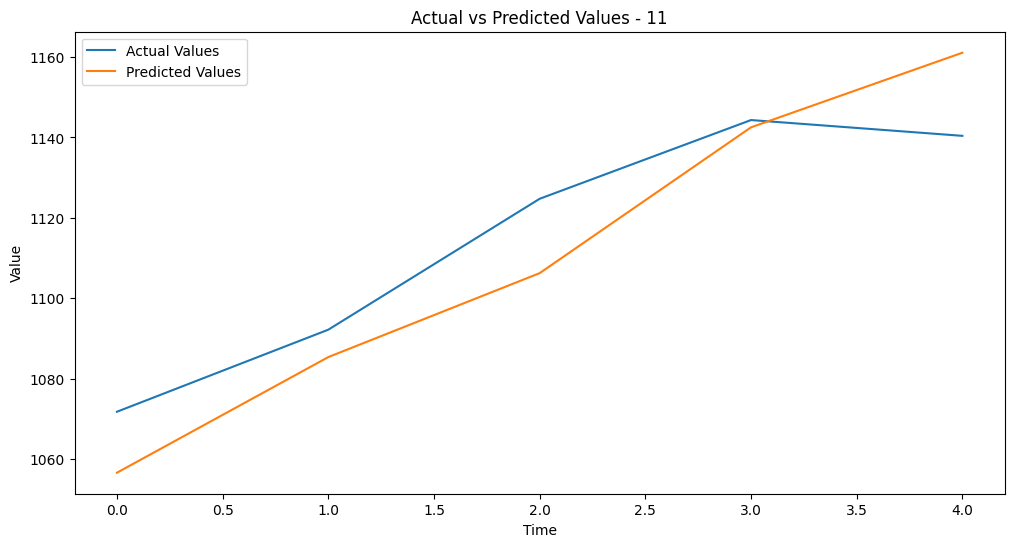

In [ ]:
train=dataset.iloc[:2340]
test=dataset.iloc[2340:2350]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 11')
plt.title('Actual vs Predicted Values - 11')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)

Actual list
1071.8
1092.1999999999998
1124.7499999999998
1144.3249999999996
1140.4
----------
Predicted list
1056.6392
1085.3906
1106.2603
1142.5178
1161.0654
----------


# twelth

146
Epoch 1/100
146/146 [==============================] - 2s 5ms/step - loss: 0.0720
Epoch 2/100
146/146 [==============================] - 1s 5ms/step - loss: 5.2957e-04
Epoch 3/100
146/146 [==============================] - 1s 7ms/step - loss: 4.7578e-04
Epoch 4/100
146/146 [==============================] - 1s 8ms/step - loss: 4.7031e-04
Epoch 5/100
146/146 [==============================] - 1s 8ms/step - loss: 4.7643e-04
Epoch 6/100
146/146 [==============================] - 1s 8ms/step - loss: 4.9249e-04
Epoch 7/100
146/146 [==============================] - 1s 6ms/step - loss: 4.8011e-04
Epoch 8/100
146/146 [==============================] - 1s 5ms/step - loss: 4.5919e-04
Epoch 9/100
146/146 [==============================] - 1s 5ms/step - loss: 4.5650e-04
Epoch 10/100
146/146 [==============================] - 1s 5ms/step - loss: 4.2818e-04
Epoch 11/100
146/146 [==============================] - 1s 5ms/step - loss: 4.2515e-04
Epoch 12/100
146/146 [==============================

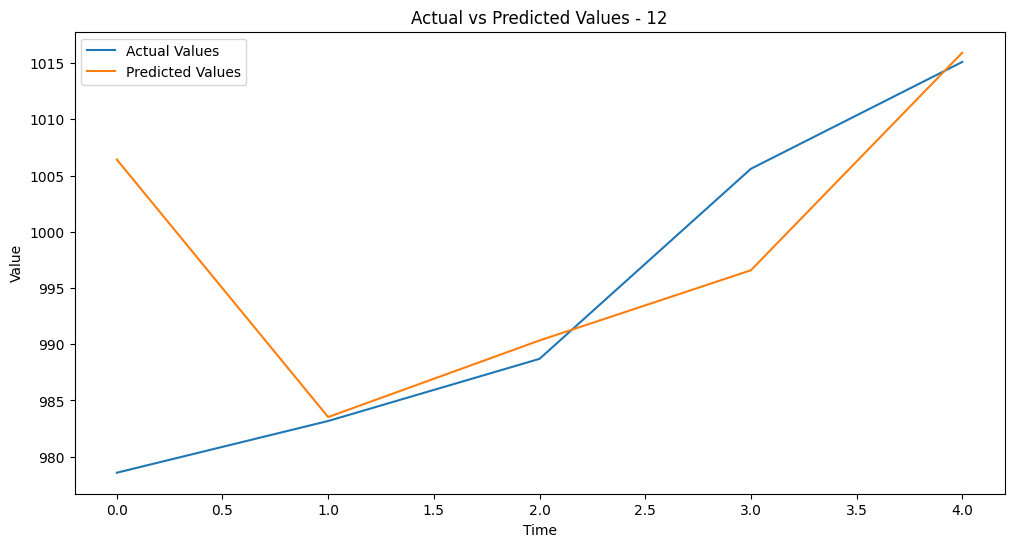

In [ ]:
train=dataset.iloc[:2330]
test=dataset.iloc[2330:2340]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_train[-10:],scaled_train[-10:],length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 12')
plt.title('Actual vs Predicted Values - 12')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)

Actual list
978.575
983.1750000000001
988.7
1005.6
1015.1
----------
Predicted list
1006.4264
983.5236
990.3359
996.57654
1015.9206
----------


# thirteen

145
Epoch 1/100
145/145 [==============================] - 2s 5ms/step - loss: 0.0471
Epoch 2/100
145/145 [==============================] - 1s 4ms/step - loss: 5.2912e-04
Epoch 3/100
145/145 [==============================] - 1s 5ms/step - loss: 5.0449e-04
Epoch 4/100
145/145 [==============================] - 1s 5ms/step - loss: 4.8505e-04
Epoch 5/100
145/145 [==============================] - 1s 5ms/step - loss: 5.0255e-04
Epoch 6/100
145/145 [==============================] - 1s 5ms/step - loss: 4.7932e-04
Epoch 7/100
145/145 [==============================] - 1s 5ms/step - loss: 4.7373e-04
Epoch 8/100
145/145 [==============================] - 1s 5ms/step - loss: 4.6305e-04
Epoch 9/100
145/145 [==============================] - 1s 7ms/step - loss: 4.7255e-04
Epoch 10/100
145/145 [==============================] - 1s 7ms/step - loss: 4.6159e-04
Epoch 11/100
145/145 [==============================] - 1s 7ms/step - loss: 4.5760e-04
Epoch 12/100
145/145 [==============================

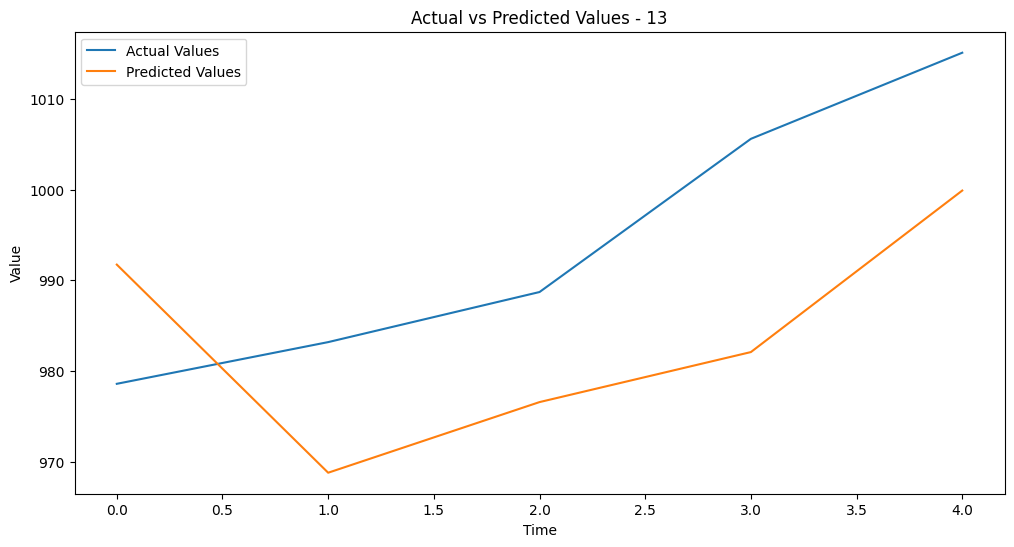

In [ ]:
train=dataset.iloc[:2320]
test=dataset.iloc[2320:2330]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 13')
plt.title('Actual vs Predicted Values - 13')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)

Actual list
978.575
983.1750000000001
988.7
1005.6
1015.1
----------
Predicted list
991.72424
968.7659
976.55804
982.0754
999.8949
----------


# Fourteen

145
Epoch 1/100
145/145 [==============================] - 3s 9ms/step - loss: 0.0553
Epoch 2/100
145/145 [==============================] - 1s 9ms/step - loss: 7.4273e-04
Epoch 3/100
145/145 [==============================] - 1s 5ms/step - loss: 5.0497e-04
Epoch 4/100
145/145 [==============================] - 1s 7ms/step - loss: 4.5571e-04
Epoch 5/100
145/145 [==============================] - 1s 7ms/step - loss: 4.7399e-04
Epoch 6/100
145/145 [==============================] - 1s 7ms/step - loss: 4.9067e-04
Epoch 7/100
145/145 [==============================] - 1s 4ms/step - loss: 4.7045e-04
Epoch 8/100
145/145 [==============================] - 1s 5ms/step - loss: 5.1384e-04
Epoch 9/100
145/145 [==============================] - 1s 4ms/step - loss: 4.7851e-04
Epoch 10/100
145/145 [==============================] - 1s 5ms/step - loss: 4.6024e-04
Epoch 11/100
145/145 [==============================] - 1s 5ms/step - loss: 4.5168e-04
Epoch 12/100
145/145 [==============================

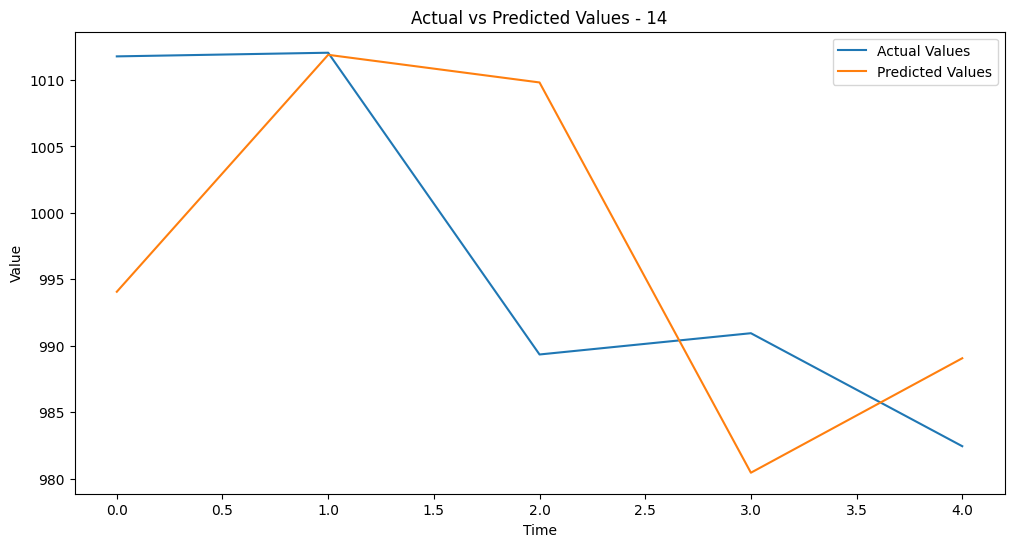

In [ ]:
train=dataset.iloc[:2310]
test=dataset.iloc[2310:2320]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 14')
plt.title('Actual vs Predicted Values - 14')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)

Predicted list
994.0682
1011.8926
1009.8135
980.4553
989.0671
----------
Actual list
1011.7750000000001
1012.0500000000001
989.35
990.95
982.45
----------


# Fifteen

144
Epoch 1/100
144/144 [==============================] - 2s 4ms/step - loss: 0.0393
Epoch 2/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 3/100
144/144 [==============================] - 1s 5ms/step - loss: 5.0787e-04
Epoch 4/100
144/144 [==============================] - 1s 5ms/step - loss: 4.7581e-04
Epoch 5/100
144/144 [==============================] - 1s 7ms/step - loss: 4.5641e-04
Epoch 6/100
144/144 [==============================] - 1s 7ms/step - loss: 4.6362e-04
Epoch 7/100
144/144 [==============================] - 1s 7ms/step - loss: 5.0870e-04
Epoch 8/100
144/144 [==============================] - 1s 5ms/step - loss: 5.1109e-04
Epoch 9/100
144/144 [==============================] - 1s 5ms/step - loss: 4.6816e-04
Epoch 10/100
144/144 [==============================] - 1s 5ms/step - loss: 4.7078e-04
Epoch 11/100
144/144 [==============================] - 1s 5ms/step - loss: 4.3230e-04
Epoch 12/100
144/144 [==============================] - 

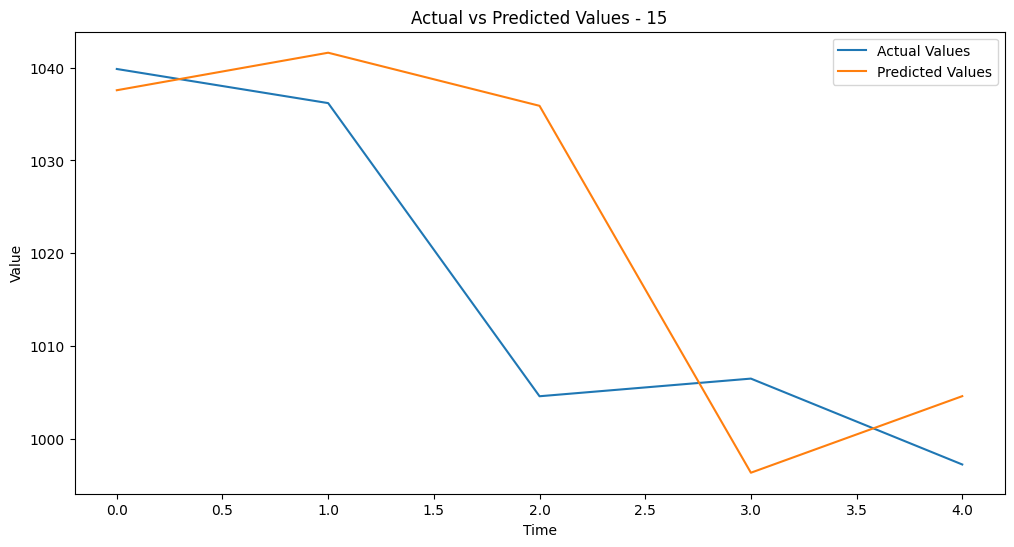

In [ ]:
train=dataset.iloc[:2300]
test=dataset.iloc[2300:2310]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 15')
plt.title('Actual vs Predicted Values - 15')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)

Actual list
1039.85
1036.175
1004.6
1006.5
997.2499999999999
----------
Predicted list
1037.5613
1041.6018
1035.8828
996.3625
1004.6091
----------


# Sixteen

143
Epoch 1/100
143/143 [==============================] - 2s 5ms/step - loss: 0.0556
Epoch 2/100
143/143 [==============================] - 1s 5ms/step - loss: 0.0015
Epoch 3/100
143/143 [==============================] - 1s 5ms/step - loss: 6.7244e-04
Epoch 4/100
143/143 [==============================] - 1s 5ms/step - loss: 5.3594e-04
Epoch 5/100
143/143 [==============================] - 1s 6ms/step - loss: 5.8423e-04
Epoch 6/100
143/143 [==============================] - 1s 8ms/step - loss: 5.5073e-04
Epoch 7/100
143/143 [==============================] - 1s 9ms/step - loss: 5.7134e-04
Epoch 8/100
143/143 [==============================] - 2s 11ms/step - loss: 5.6287e-04
Epoch 9/100
143/143 [==============================] - 2s 12ms/step - loss: 5.5687e-04
Epoch 10/100
143/143 [==============================] - 1s 7ms/step - loss: 4.5902e-04
Epoch 11/100
143/143 [==============================] - 1s 7ms/step - loss: 5.3760e-04
Epoch 12/100
143/143 [==============================] 

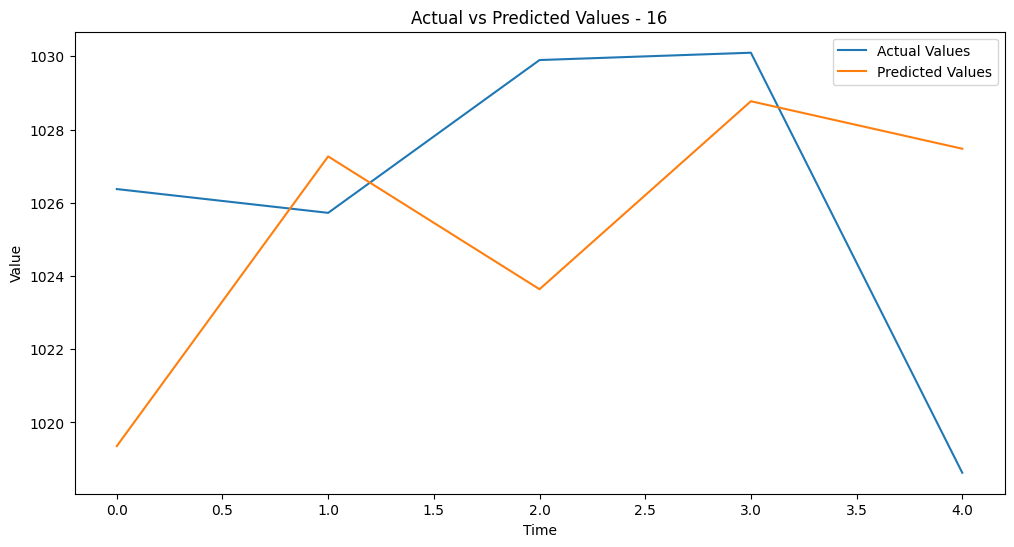

In [ ]:
train=dataset.iloc[:2290]
test=dataset.iloc[2290:2300]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 16')
plt.title('Actual vs Predicted Values - 16')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)

Actual list
1026.375
1025.725
1029.9
1030.1
1018.625
----------
Predicted list
1019.353
1027.2673
1023.6387
1028.7747
1027.477
----------


# Seventeen

143
Epoch 1/100
143/143 [==============================] - 3s 7ms/step - loss: 0.0538
Epoch 2/100
143/143 [==============================] - 1s 7ms/step - loss: 7.3199e-04
Epoch 3/100
143/143 [==============================] - 1s 7ms/step - loss: 5.9367e-04
Epoch 4/100
143/143 [==============================] - 1s 8ms/step - loss: 5.3672e-04
Epoch 5/100
143/143 [==============================] - 1s 7ms/step - loss: 5.6075e-04
Epoch 6/100
143/143 [==============================] - 1s 8ms/step - loss: 5.5019e-04
Epoch 7/100
143/143 [==============================] - 1s 7ms/step - loss: 6.0133e-04
Epoch 8/100
143/143 [==============================] - 1s 7ms/step - loss: 5.7127e-04
Epoch 9/100
143/143 [==============================] - 1s 8ms/step - loss: 5.6288e-04
Epoch 10/100
143/143 [==============================] - 1s 7ms/step - loss: 5.0680e-04
Epoch 11/100
143/143 [==============================] - 1s 5ms/step - loss: 5.6081e-04
Epoch 12/100
143/143 [==============================

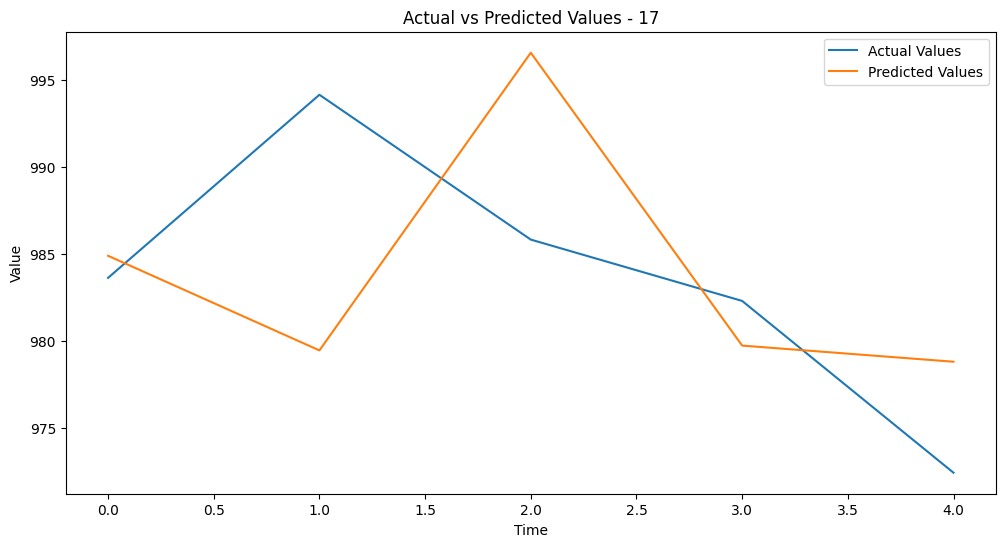

In [ ]:
train=dataset.iloc[:2280]
test=dataset.iloc[2280:2290]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 17')
plt.title('Actual vs Predicted Values - 17')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)

Actual list
983.625
994.15
985.825
982.2999999999998
972.425
----------
Predicted list
984.8952
979.45605
996.5664
979.73254
978.80493
----------


# Eighteen

142
Epoch 1/100
142/142 [==============================] - 2s 5ms/step - loss: 0.0621
Epoch 2/100
142/142 [==============================] - 1s 5ms/step - loss: 0.0014
Epoch 3/100
142/142 [==============================] - 1s 5ms/step - loss: 9.1650e-04
Epoch 4/100
142/142 [==============================] - 1s 5ms/step - loss: 7.0795e-04
Epoch 5/100
142/142 [==============================] - 1s 7ms/step - loss: 6.3441e-04
Epoch 6/100
142/142 [==============================] - 2s 14ms/step - loss: 6.1023e-04
Epoch 7/100
142/142 [==============================] - 2s 16ms/step - loss: 6.3033e-04
Epoch 8/100
142/142 [==============================] - 2s 11ms/step - loss: 6.0900e-04
Epoch 9/100
142/142 [==============================] - 1s 5ms/step - loss: 7.0370e-04
Epoch 10/100
142/142 [==============================] - 1s 5ms/step - loss: 5.8900e-04
Epoch 11/100
142/142 [==============================] - 1s 5ms/step - loss: 6.1492e-04
Epoch 12/100
142/142 [==============================]

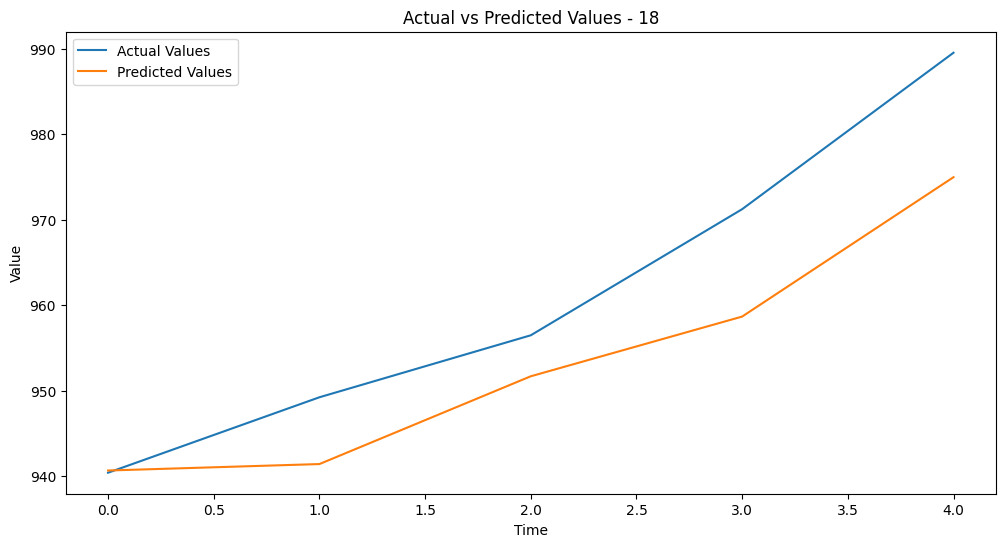

In [ ]:
train=dataset.iloc[:2270]
test=dataset.iloc[2270:2280]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 18')
plt.title('Actual vs Predicted Values - 18')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)

Actual list
940.4000000000001
949.2249999999999
956.475
971.225
989.525
----------
Predicted list
940.65845
941.41315
951.6804
958.66394
974.9672
----------


# Ninteen

141
Epoch 1/100
141/141 [==============================] - 3s 5ms/step - loss: 0.0497
Epoch 2/100
141/141 [==============================] - 1s 5ms/step - loss: 7.1919e-04
Epoch 3/100
141/141 [==============================] - 1s 5ms/step - loss: 5.7859e-04
Epoch 4/100
141/141 [==============================] - 1s 5ms/step - loss: 5.4467e-04
Epoch 5/100
141/141 [==============================] - 1s 5ms/step - loss: 5.2808e-04
Epoch 6/100
141/141 [==============================] - 1s 5ms/step - loss: 5.9555e-04
Epoch 7/100
141/141 [==============================] - 1s 5ms/step - loss: 6.4504e-04
Epoch 8/100
141/141 [==============================] - 1s 5ms/step - loss: 5.3025e-04
Epoch 9/100
141/141 [==============================] - 1s 5ms/step - loss: 6.3165e-04
Epoch 10/100
141/141 [==============================] - 1s 4ms/step - loss: 5.4896e-04
Epoch 11/100
141/141 [==============================] - 1s 5ms/step - loss: 5.0407e-04
Epoch 12/100
141/141 [==============================

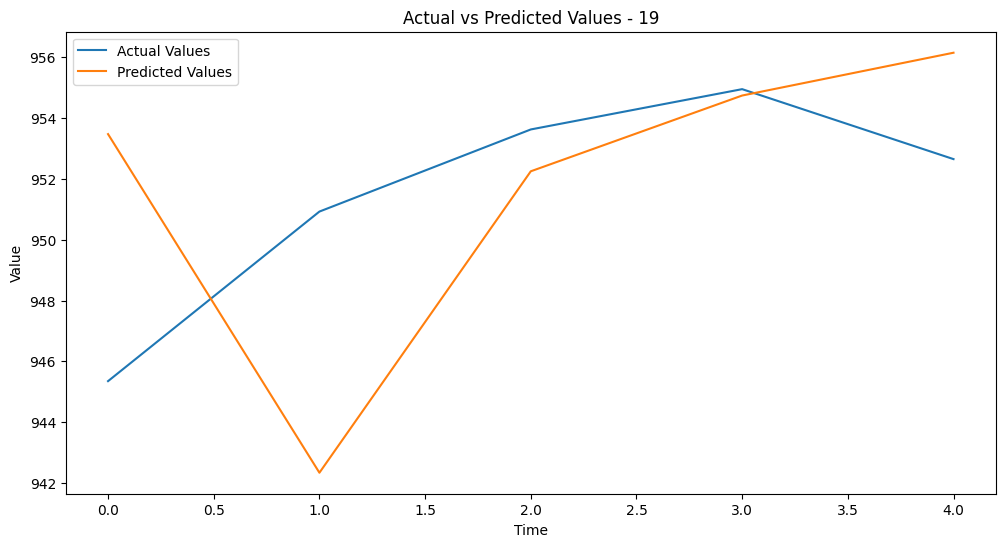

In [ ]:
train=dataset.iloc[:2260]
test=dataset.iloc[2260:2270]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 19')
plt.title('Actual vs Predicted Values - 19')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)

Actual list
945.35
950.925
953.625
954.95
952.6499999999999
----------
Predicted list
953.47174
942.33875
952.24915
954.7401
956.1478
----------


# Twenty

141
Epoch 1/100
141/141 [==============================] - 3s 10ms/step - loss: 0.0419
Epoch 2/100
141/141 [==============================] - 1s 7ms/step - loss: 6.1082e-04
Epoch 3/100
141/141 [==============================] - 1s 6ms/step - loss: 5.7723e-04
Epoch 4/100
141/141 [==============================] - 1s 5ms/step - loss: 5.4044e-04
Epoch 5/100
141/141 [==============================] - 1s 5ms/step - loss: 5.6524e-04
Epoch 6/100
141/141 [==============================] - 1s 6ms/step - loss: 5.1120e-04
Epoch 7/100
141/141 [==============================] - 1s 7ms/step - loss: 5.0151e-04
Epoch 8/100
141/141 [==============================] - 1s 7ms/step - loss: 5.8132e-04
Epoch 9/100
141/141 [==============================] - 1s 7ms/step - loss: 4.9730e-04
Epoch 10/100
141/141 [==============================] - 1s 5ms/step - loss: 5.2672e-04
Epoch 11/100
141/141 [==============================] - 1s 5ms/step - loss: 5.1829e-04
Epoch 12/100
141/141 [=============================

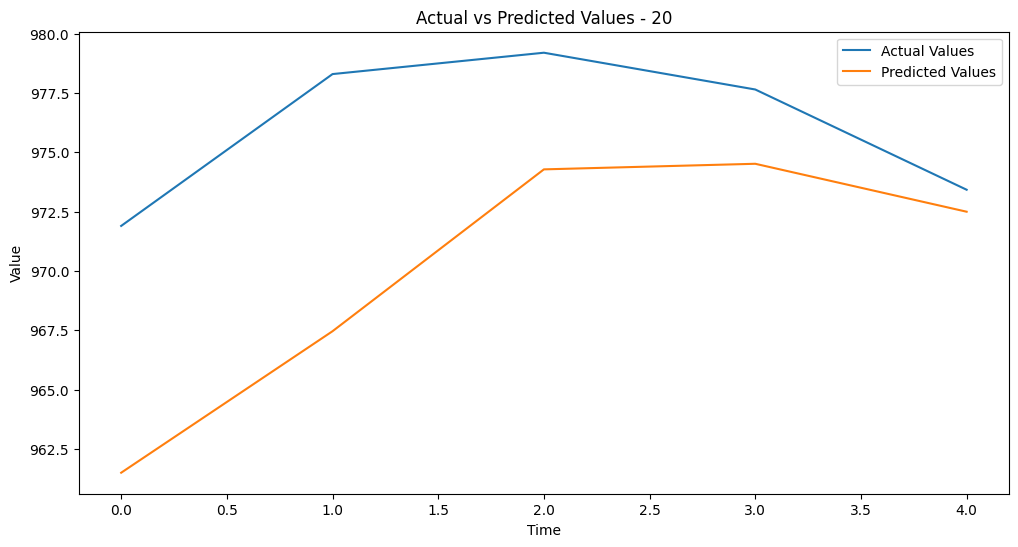

In [ ]:
train=dataset.iloc[:2250]
test=dataset.iloc[2250:2260]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=16)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=50)
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(5):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])
print('xlist',xlist)
print('ylist',ylist)
ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 20')
plt.title('Actual vs Predicted Values - 20')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print('Actual list')
actual_list=[ylist[i][0] for i in range(len(ylist))]
for _ in actual_list:
  print(_)
print('-'*10)
pred_list=[true_predictions[i][0] for i in range(len(true_predictions))]
print('Predicted list')
for _ in pred_list:
  print(_)
print('-'*10)

Actual list
971.9
978.3
979.1999999999999
977.65
973.425
----------
Predicted list
961.4976
967.46204
974.28357
974.51917
972.49866
----------
